In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=e083d41b9e92bcefd6f95b6590e5b81af0856467b75938259a0575441bce8dc2
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_csv("/kaggle/input/emonoba-cadc-clean/emonoba_train.csv")

In [4]:
df_train.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False


In [5]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [6]:
df_train

,Data,Label
0,লকাল বাস ভালো এটা থেকে,Sadness
1,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,Sadness
2,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,Anger
3,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,Sadness
4,সত্যিকার মানুষ তারাই ভাই,Joy
...,...,...
18415,সমস্যা নাই ইনশাআল্লাহ আমরা একদিন ক্রিকেট কে শা...,Joy
18416,খানকিরপুলা তর মাকে গিয়ে বল দেহো দিলা মনটা দিলা...,Sadness
18417,ভাই চেয়ার কই🙄,Surprise
18418,সবকয়টা তো একই গোয়ালের গাই,Sadness


In [7]:
df_train.dropna(inplace=True)

In [8]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1249


In [9]:
df_train['Label'].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [10]:
df_val = pd.read_csv("/kaggle/input/emonoba-cadc-clean/emonoba_val.csv")

In [11]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_val = df_val[['Data', 'Label']]

In [12]:
df_val.dropna(inplace=True)

In [13]:
df_val['Label'].value_counts()

Label
Joy         743
Sadness     429
Love        414
Anger       362
Surprise     79
Fear         20
Name: count, dtype: int64

In [14]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [15]:
df_train['Data'] = df_train['Data'].apply(clean_text)
df_val['Data'] = df_val['Data'].apply(clean_text)

In [16]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [17]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [18]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [19]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.3 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=35092959a67ed98fdca86265c93a0367ef84e6a44b39d249c9f05592b18a8182
  Stored in directory: /roo

In [20]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [21]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 10
	95percentile : 26
	99percentile : 46


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 27
	99percentile : 51


In [22]:
print(trn)

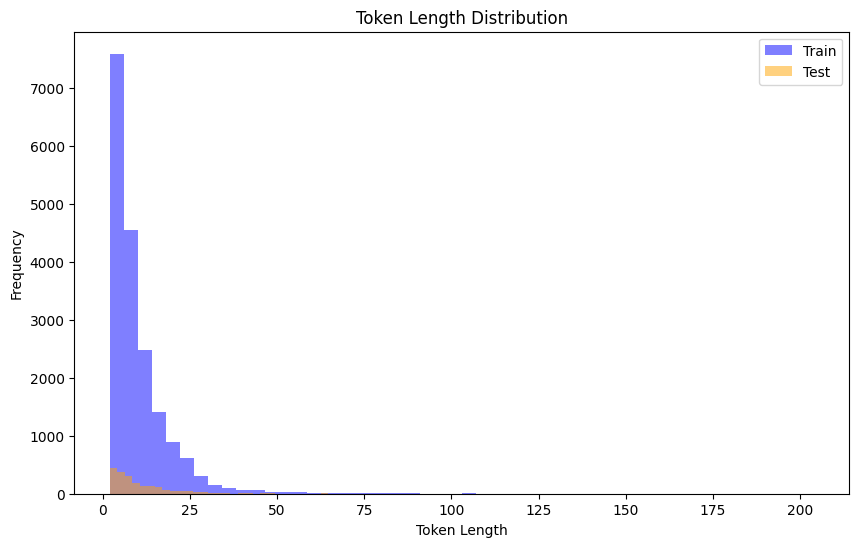

In [23]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [24]:
model = t.get_classifier()

In [25]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [26]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [27]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2303/2303 [==============================] - 1379s 585ms/step - loss: 1.2587 - accuracy: 0.4872 - val_loss: 1.0511 - val_accuracy: 0.5867
Epoch 2/10
2303/2303 [==============================] - 1344s 583ms/step - loss: 1.0090 - accuracy: 0.6066 - val_loss: 0.9792 - val_accuracy: 0.6004
Epoch 3/10
2303/2303 [==============================] - 1344s 583ms/step - loss: 0.8888 - accuracy: 0.6525 - val_loss: 0.9106 - val_accuracy: 0.6326
Epoch 4/10
2303/2303 [==============================] - 1344s 583ms/step - loss: 0.7841 - accuracy: 0.6917 - val_loss: 0.9444 - val_accuracy: 0.6277
Epoch 5/10
2303/2303 [==============================] - 1343s 583ms/step - loss: 0.6810 - accuracy: 0.7338 - val_loss: 1.0467 - val_accuracy: 0.6146
Epoch 6/10
2303/2303 [==============================] - 1342s 583ms/step - loss: 0.5840 - accuracy: 0.7701 - val_loss: 1.0141 - val_accuracy: 0.6292
Epoch 7/10
2303/2303 [=====================

In [28]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [29]:
classes=t.get_classes()

In [30]:
cm = learner.validate(class_names=t.get_classes())

64/64 [==============================] - 26s 361ms/step
              precision    recall  f1-score   support

       Anger       0.58      0.57      0.58       362
        Fear       0.20      0.10      0.13        20
         Joy       0.66      0.64      0.65       743
        Love       0.54      0.54      0.54       414
     Sadness       0.72      0.74      0.73       429
    Surprise       0.41      0.52      0.46        79

    accuracy                           0.62      2047
   macro avg       0.52      0.52      0.51      2047
weighted avg       0.62      0.62      0.62      2047



In [31]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [32]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [33]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [34]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [35]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")